In [1]:
#imports
import pandas as pd
import numpy as np
import os

In [2]:
#set the path of the test,training data.
default_path = '/home/nsamba/projects/titanic/'
raw_data_path = os.path.join(default_path,'data','raw')
train_file_path = os.path.join(raw_data_path,'train.csv')
test_file_path = os.path.join(raw_data_path,'test.csv')

In [3]:
#Read csv data into dataframes using pandas
ind = 'PassengerId'
train_df = pd.read_csv(train_file_path,index_col=ind)
test_df = pd.read_csv(test_file_path,index_col=ind)

In [4]:
#explore the data 
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [5]:
test_df['Survived'] = -888 #assigning arbitrary value to data

In [6]:
df = pd.concat((train_df,test_df), axis=0) #axis 0 concats tables in a vertical stack manner. ie rows combined by vertical stack

/home/nsamba/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [7]:
df.head(10)

Age Cabin Embarked     Fare  \
PassengerId                                 
1            22.0   NaN        S   7.2500   
2            38.0   C85        C  71.2833   
3            26.0   NaN        S   7.9250   
4            35.0  C123        S  53.1000   
5            35.0   NaN        S   8.0500   
6             NaN   NaN        Q   8.4583   
7            54.0   E46        S  51.8625   
8             2.0   NaN        S  21.0750   
9            27.0   NaN        S  11.1333   
10           14.0   NaN        C  30.0708   

                                                          Name  Parch  Pclass  \
PassengerId                                                                     
1                                      Braund, Mr. Owen Harris      0       3   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...      0       1   
3                                       Heikkinen, Miss. Laina      0       3   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)      0       1   
5                                     Allen, Mr. William Henry      0       3   
6                                             Moran, Mr. James      0       3   
7                                      McCarthy, Mr. Timothy J      0       1   
8                               Palsson, Master. Gosta Leonard      1       3   
9            Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)      2       3   
10                         Nasser, Mrs. Nicholas (Adele Achem)      0       2   

                Sex  SibSp  Survived            Ticket  
PassengerId                                             
1              male      1         0         A/5 21171  
2            female      1         1          PC 17599  
3            female      0         1  STON/O2. 3101282  
4            female      1         1            113803  
5              male      0         0            373450  
6              male      0         0            330877  
7              male      0         0             17463  
8              male      3         0            349909  
9            female      0         1            347742  
10           female      1         1            237736

In [8]:
df.tail()

Age Cabin Embarked      Fare                          Name  \
PassengerId                                                                
1305          NaN   NaN        S    8.0500            Spector, Mr. Woolf   
1306         39.0  C105        C  108.9000  Oliva y Ocana, Dona. Fermina   
1307         38.5   NaN        S    7.2500  Saether, Mr. Simon Sivertsen   
1308          NaN   NaN        S    8.0500           Ware, Mr. Frederick   
1309          NaN   NaN        C   22.3583      Peter, Master. Michael J   

             Parch  Pclass     Sex  SibSp  Survived              Ticket  
PassengerId                                                              
1305             0       3    male      0      -888           A.5. 3236  
1306             0       1  female      0      -888            PC 17758  
1307             0       3    male      0      -888  SOTON/O.Q. 3101262  
1308             0       3    male      0      -888              359309  
1309             1       3    male      1      -888                2668

In [9]:
#using selecting functionality of pandas
males_second_class = df.loc[((df.Sex == 'male') & (df.Pclass == 2)),:]
print("The number of Men in second class are {0}".format(len(males_second_class)))

The number of Men in second class are 171


In [10]:
#view statistics on the data
df.describe()

Age         Fare        Parch       Pclass        SibSp  \
count  1046.000000  1308.000000  1309.000000  1309.000000  1309.000000   
mean     29.881138    33.295479     0.385027     2.294882     0.498854   
std      14.413493    51.758668     0.865560     0.837836     1.041658   
min       0.170000     0.000000     0.000000     1.000000     0.000000   
25%      21.000000     7.895800     0.000000     2.000000     0.000000   
50%      28.000000    14.454200     0.000000     3.000000     0.000000   
75%      39.000000    31.275000     0.000000     3.000000     1.000000   
max      80.000000   512.329200     9.000000     3.000000     8.000000   

          Survived  
count  1309.000000  
mean   -283.301757  
std     414.337413  
min    -888.000000  
25%    -888.000000  
50%       0.000000  
75%       1.000000  
max       1.000000

In [11]:
#statistics on single columns of data
#say Age and Fare
print("The Mean Fare and Age are: {0} and {1}".format(df.Fare.mean(),df.Age.mean()))
print("The Medians of Fare and Age are: {0} and {1}".format(df.Fare.median(),df.Age.median()))

The Mean Fare and Age are: 33.29547928134557 and 29.881137667304014
The Medians of Fare and Age are: 14.4542 and 28.0


In [12]:
#finding the highest and lowest fares
print("The Highest Fare: {0}".format(df.Fare.max()))
print("The lowest Fare: {0}".format(df.Fare.min()))

The Highest Fare: 512.3292
The lowest Fare: 0.0


In [13]:
#The percentiles on the Fare
print("The 95th percentile of Fares was: {0}".format(df.Fare.quantile(.95)))


The 95th percentile of Fares was: 133.65


In [14]:
#variance and std deviations are:
print("The std deviation of Fares: {0}".format(df.Fare.std()))

The std deviation of Fares: 51.75866823917411


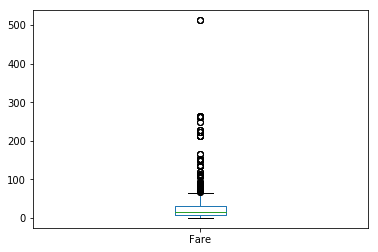

In [15]:
%matplotlib inline
df.Fare.plot(kind='box')

In [16]:
df.describe(include='all')

Age        Cabin Embarked         Fare                  Name  \
count   1046.000000          295     1307  1308.000000                  1309   
unique          NaN          186        3          NaN                  1307   
top             NaN  C23 C25 C27        S          NaN  Connolly, Miss. Kate   
freq            NaN            6      914          NaN                     2   
mean      29.881138          NaN      NaN    33.295479                   NaN   
std       14.413493          NaN      NaN    51.758668                   NaN   
min        0.170000          NaN      NaN     0.000000                   NaN   
25%       21.000000          NaN      NaN     7.895800                   NaN   
50%       28.000000          NaN      NaN    14.454200                   NaN   
75%       39.000000          NaN      NaN    31.275000                   NaN   
max       80.000000          NaN      NaN   512.329200                   NaN   

              Parch       Pclass   Sex        SibSp     Survived    Ticket  
count   1309.000000  1309.000000  1309  1309.000000  1309.000000      1309  
unique          NaN          NaN     2          NaN          NaN       929  
top             NaN          NaN  male          NaN          NaN  CA. 2343  
freq            NaN          NaN   843          NaN          NaN        11  
mean       0.385027     2.294882   NaN     0.498854  -283.301757       NaN  
std        0.865560     0.837836   NaN     1.041658   414.337413       NaN  
min        0.000000     1.000000   NaN     0.000000  -888.000000       NaN  
25%        0.000000     2.000000   NaN     0.000000  -888.000000       NaN  
50%        0.000000     3.000000   NaN     0.000000     0.000000       NaN  
75%        0.000000     3.000000   NaN     1.000000     1.000000       NaN  
max        9.000000     3.000000   NaN     8.000000     1.000000       NaN

In [17]:
df.Embarked.value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [18]:
df.Embarked.value_counts(normalize=True)

S    0.699311
C    0.206580
Q    0.094109
Name: Embarked, dtype: float64

In [19]:
df[df.Survived != -888].Survived.value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

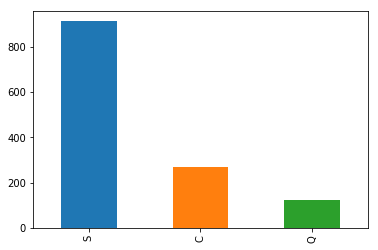

In [20]:
df.Embarked.value_counts().plot(kind='bar')

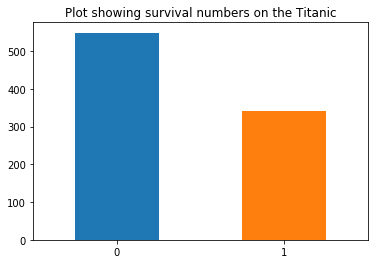

In [21]:
df[df.Survived!= -888].Survived.value_counts().plot(kind='bar',rot=0,title="Plot showing survival numbers on the Titanic")

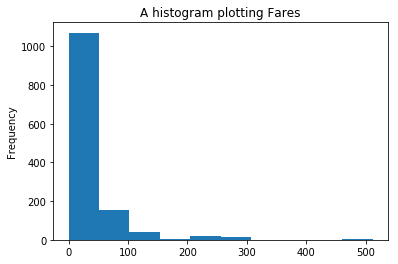

In [22]:
#Distributions.
#let's begin with histograms
df.Fare.plot(kind="hist",rot=0,title="A histogram plotting Fares")

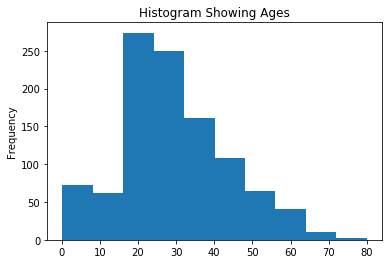

In [23]:
df.Age.plot(kind='hist',rot=0,title="Histogram Showing Ages")

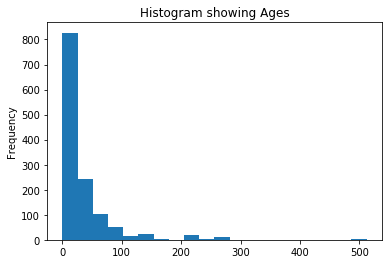

In [24]:
#I leaned you could vary the class numbers using bin
df.Fare.plot(kind="hist",rot=0,title="Histogram showing Ages",bins=20)

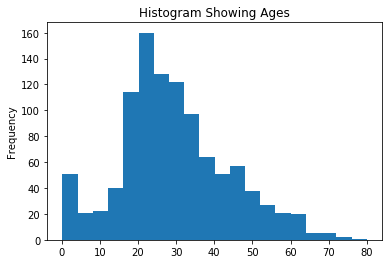

In [25]:
#Similarly This could be done for others too.
df.Age.plot(kind="hist",rot=0,title="Histogram Showing Ages",bins=20)

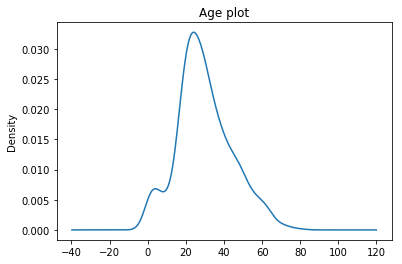

In [26]:
#I learn we could do even more with KDE (Kernel Density Estimation).
#It helps in figuring out probabilities with stastical data.
df.Age.plot(kind="kde",title="Age plot")

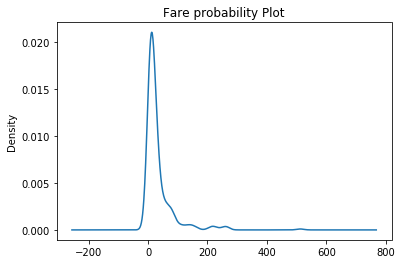

In [27]:
#Compare KDE plot of above with that of Fares.
df.Fare.plot(kind="kde",rot=0,title="Fare probability Plot")

In [28]:
#It is evident there is skew from both data.
#We can infact measure this skew using pandas.
print("Skew of Age: {0}".format(df.Age.skew()))
print("Skewn of Fares: {0}".format(df.Fare.skew()))

Skew of Age: 0.40767455974362266
Skewn of Fares: 4.367709134122922


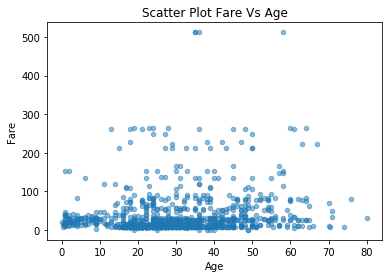

In [29]:
df.plot.scatter(x='Age',y='Fare',title="Scatter Plot Fare Vs Age",alpha=0.5)

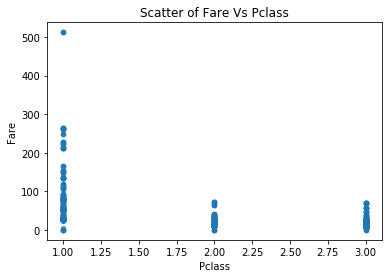

In [30]:
df.plot.scatter(x='Pclass',y='Fare',title="Scatter of Fare Vs Pclass",alpha=0.6)

In [31]:
#Grouping
#suppose we group passengers by Sex
df.groupby('Sex').Age.median()

Sex
female    27.0
male      28.0
Name: Age, dtype: float64

In [32]:
df[df.Survived == 1 ].groupby('Sex').Survived.value_counts() #Finding numbers of survived by Sex.

Sex     Survived
female  1           233
male    1           109
Name: Survived, dtype: int64

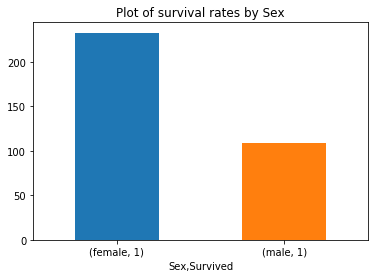

In [33]:
%matplotlib inline
df[df.Survived == 1].groupby('Sex').Survived.value_counts().plot(kind='bar',rot=0, title="Plot of survival rates by Sex")

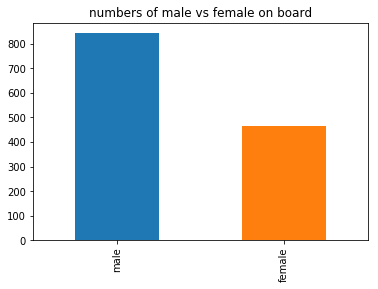

In [34]:
df.Sex.value_counts().plot(kind='bar',title="numbers of male vs female on board")

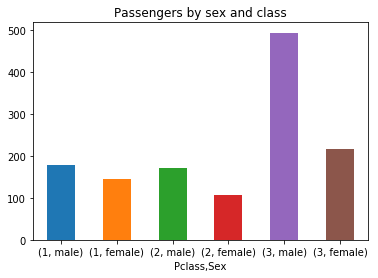

In [35]:
df.groupby('Pclass').Sex.value_counts().plot(kind='bar',rot=0,title="Passengers by sex and class")

In [36]:
df.groupby('Pclass')['Fare','Age'].mean()

Fare        Age
Pclass                      
1       87.508992  39.159930
2       21.179196  29.506705
3       13.302889  24.816367

In [37]:
df.groupby(['Pclass','Sex']).agg({'Fare':'mean','Age':'mean'})

Fare        Age
Pclass Sex                          
1      female  109.412385  37.037594
       male     69.888385  41.029272
2      female   23.234827  27.499223
       male     19.904946  30.815380
3      female   15.324250  22.185329
       male     12.415462  25.962264

In [38]:
aggregations={
    'Fare':{
        'mean_fare':'mean',
        'median_fare':'median',
        'min_fare':np.min
    },
    'Age':{
        'mean_age':'mean',
        'median_age': 'median',
        'min_age': min
    }
}


In [39]:
df.groupby(['Pclass','Sex']).agg(aggregations)

/home/nsamba/miniconda3/lib/python3.6/site-packages/pandas/core/groupby/groupby.py:4658: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


Fare                             Age                   
                mean_fare median_fare min_fare   mean_age median_age min_age
Pclass Sex                                                                  
1      female  109.412385    80.92915    25.70  37.037594       36.0    2.00
       male     69.888385    49.50420     0.00  41.029272       42.0    0.92
2      female   23.234827    23.00000    10.50  27.499223       28.0    0.92
       male     19.904946    13.00000     0.00  30.815380       29.5    0.67
3      female   15.324250    10.48960     6.75  22.185329       22.0    0.17
       male     12.415462     7.89580     0.00  25.962264       25.0    0.33

In [40]:
pd.crosstab(df.Sex,df.Pclass)

Pclass    1    2    3
Sex                  
female  144  106  216
male    179  171  493

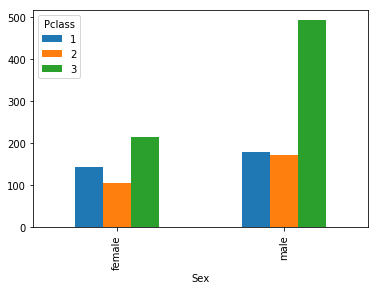

In [41]:
pd.crosstab(df.Sex,df.Pclass).plot(kind='bar')

In [42]:
df.pivot_table(index='Sex',columns='Pclass',values='Age',aggfunc='mean')

Pclass          1          2          3
Sex                                    
female  37.037594  27.499223  22.185329
male    41.029272  30.815380  25.962264

In [43]:
#detect if misssing values existin our data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1307 non-null object
Fare        1308 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 162.7+ KB


In [44]:
#Embarked is less by 2 as in 1309 Vs 1307
df[df.Embarked.isnull()]

Age Cabin Embarked  Fare  \
PassengerId                              
62           38.0   B28      NaN  80.0   
830          62.0   B28      NaN  80.0   

                                                  Name  Parch  Pclass     Sex  \
PassengerId                                                                     
62                                 Icard, Miss. Amelie      0       1  female   
830          Stone, Mrs. George Nelson (Martha Evelyn)      0       1  female   

             SibSp  Survived  Ticket  
PassengerId                           
62               0         1  113572  
830              0         1  113572

In [45]:
df.groupby('Embarked').Embarked.value_counts()

Embarked  Embarked
C         C           270
Q         Q           123
S         S           914
Name: Embarked, dtype: int64

In [46]:
#explore using Fares 
df.groupby(['Pclass','Embarked']).Fare.median()

Pclass  Embarked
1       C           76.7292
        Q           90.0000
        S           52.0000
2       C           15.3146
        Q           12.3500
        S           15.3750
3       C            7.8958
        Q            7.7500
        S            8.0500
Name: Fare, dtype: float64

In [47]:
#Recall that median is a measure of centrality. Since the median fare is 76 at Cin the first class, And the Missing Passengers paid 80.
#It Can be assumed that these passengers probably embarked from C.


In [48]:
#therefore.
df.Embarked.fillna('C',inplace=True)

In [49]:
#check to see emissing
df[df.Embarked.isnull()]

Empty DataFrame
Columns: [Age, Cabin, Embarked, Fare, Name, Parch, Pclass, Sex, SibSp, Survived, Ticket]
Index: []

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1309 non-null object
Fare        1308 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 162.7+ KB


In [51]:
#Fix Fare
df[df.Fare.isnull()]

Age Cabin Embarked  Fare                Name  Parch  Pclass  \
PassengerId                                                                 
1044         60.5   NaN        S   NaN  Storey, Mr. Thomas      0       3   

              Sex  SibSp  Survived Ticket  
PassengerId                                
1044         male      0      -888   3701

In [52]:
df.groupby(['Pclass','Embarked']).Fare.median()

Pclass  Embarked
1       C           78.2667
        Q           90.0000
        S           52.0000
2       C           15.3146
        Q           12.3500
        S           15.3750
3       C            7.8958
        Q            7.7500
        S            8.0500
Name: Fare, dtype: float64

In [53]:
median_fare = df.loc[((df.Embarked=='S') & (df.Pclass==3)),:].Fare.median()

In [54]:
print(median_fare)

8.05


In [55]:
df.Fare.fillna(median_fare,inplace=True)

In [56]:
df[df.Fare.isnull()]

Empty DataFrame
Columns: [Age, Cabin, Embarked, Fare, Name, Parch, Pclass, Sex, SibSp, Survived, Ticket]
Index: []

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1309 non-null object
Fare        1309 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 162.7+ KB


In [58]:
df[df.Age.isnull()]

Age  Cabin Embarked      Fare  \
PassengerId                                  
6            NaN    NaN        Q    8.4583   
18           NaN    NaN        S   13.0000   
20           NaN    NaN        C    7.2250   
27           NaN    NaN        C    7.2250   
29           NaN    NaN        Q    7.8792   
30           NaN    NaN        S    7.8958   
32           NaN    B78        C  146.5208   
33           NaN    NaN        Q    7.7500   
37           NaN    NaN        C    7.2292   
43           NaN    NaN        C    7.8958   
46           NaN    NaN        S    8.0500   
47           NaN    NaN        Q   15.5000   
48           NaN    NaN        Q    7.7500   
49           NaN    NaN        C   21.6792   
56           NaN    C52        S   35.5000   
65           NaN    NaN        C   27.7208   
66           NaN    NaN        C   15.2458   
77           NaN    NaN        S    7.8958   
78           NaN    NaN        S    8.0500   
83           NaN    NaN        Q    7.7875   
88           NaN    NaN        S    8.0500   
96           NaN    NaN        S    8.0500   
102          NaN    NaN        S    7.8958   
108          NaN    NaN        S    7.7750   
110          NaN    NaN        Q   24.1500   
122          NaN    NaN        S    8.0500   
127          NaN    NaN        Q    7.7500   
129          NaN  F E69        C   22.3583   
141          NaN    NaN        C   15.2458   
155          NaN    NaN        S    7.3125   
...          ...    ...      ...       ...   
1160         NaN    NaN        S    8.0500   
1163         NaN    NaN        Q    7.7500   
1165         NaN    NaN        Q   15.5000   
1166         NaN    NaN        C    7.2250   
1174         NaN    NaN        Q    7.7500   
1178         NaN    NaN        S    7.2500   
1180         NaN  F E46        C    7.2292   
1181         NaN    NaN        S    8.0500   
1182         NaN    NaN        S   39.6000   
1184         NaN    NaN        C    7.2292   
1189         NaN    NaN        C   21.6792   
1193         NaN      D        C   15.0458   
1196         NaN    NaN        Q    7.7500   
1204         NaN    NaN        S    7.5750   
1224         NaN    NaN        C    7.2250   
1231         NaN    NaN        C    7.2292   
1234         NaN    NaN        S   69.5500   
1236         NaN    NaN        S   14.5000   
1249         NaN    NaN        S    7.8792   
1250         NaN    NaN        Q    7.7500   
1257         NaN    NaN        S   69.5500   
1258         NaN    NaN        C   14.4583   
1272         NaN    NaN        Q    7.7500   
1274         NaN    NaN        S   14.5000   
1276         NaN    NaN        S   12.8750   
1300         NaN    NaN        Q    7.7208   
1302         NaN    NaN        Q    7.7500   
1305         NaN    NaN        S    8.0500   
1308         NaN    NaN        S    8.0500   
1309         NaN    NaN        C   22.3583   

                                                       Name  Parch  Pclass  \
PassengerId                                                                  
6                                          Moran, Mr. James      0       3   
18                             Williams, Mr. Charles Eugene      0       2   
20                                  Masselmani, Mrs. Fatima      0       3   
27                                  Emir, Mr. Farred Chehab      0       3   
29                            O'Dwyer, Miss. Ellen "Nellie"      0       3   
30                                      Todoroff, Mr. Lalio      0       3   
32           Spencer, Mrs. William Augustus (Marie Eugenie)      0       1   
33                                 Glynn, Miss. Mary Agatha      0       3   
37                                         Mamee, Mr. Hanna      0       3   
43                                      Kraeff, Mr. Theodor      0       3   
46                                 Rogers, Mr. William John      0       3   
47                                        Lennon, Mr. Denis      0       3   
48                    

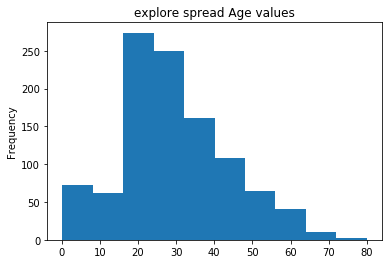

In [59]:
df.Age.plot(kind='hist',title="explore spread Age values")

In [60]:
df.Age.mean()

29.881137667304014

In [61]:
df.groupby('Sex').Age.median()

Sex
female    27.0
male      28.0
Name: Age, dtype: float64

In [62]:
df.groupby('Sex').Age.mean()

Sex
female    28.687088
male      30.585228
Name: Age, dtype: float64

In [63]:
df.Age.median()

28.0

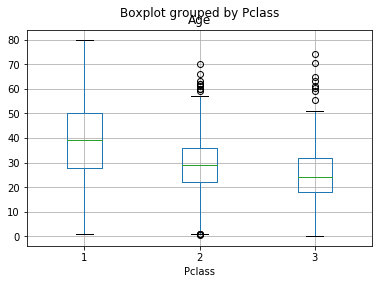

In [64]:
df[df.Age.notnull()].boxplot('Age','Pclass')

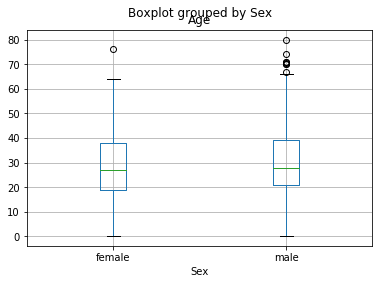

In [65]:
df[df.Age.notnull()].boxplot('Age','Sex')

In [66]:
#use name
df.Name

PassengerId
1                                 Braund, Mr. Owen Harris
2       Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                  Heikkinen, Miss. Laina
4            Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                                Allen, Mr. William Henry
6                                        Moran, Mr. James
7                                 McCarthy, Mr. Timothy J
8                          Palsson, Master. Gosta Leonard
9       Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
10                    Nasser, Mrs. Nicholas (Adele Achem)
11                        Sandstrom, Miss. Marguerite Rut
12                               Bonnell, Miss. Elizabeth
13                         Saundercock, Mr. William Henry
14                            Andersson, Mr. Anders Johan
15                   Vestrom, Miss. Hulda Amanda Adolfina
16                       Hewlett, Mrs. (Mary D Kingcome) 
17                                   Rice, Master. Eugene
18

In [67]:
def GetTitle(name):
    first_name_with_tt = name.split(',')[1]
    title = first_name_with_tt.split('.')[0]
    title = title.strip().lower()
    return title    

In [68]:
df.Name.map(lambda x: GetTitle(x))

PassengerId
1           mr
2          mrs
3         miss
4          mrs
5           mr
6           mr
7           mr
8       master
9          mrs
10         mrs
11        miss
12        miss
13          mr
14          mr
15        miss
16         mrs
17      master
18          mr
19         mrs
20         mrs
21          mr
22          mr
23        miss
24          mr
25        miss
26         mrs
27          mr
28          mr
29        miss
30          mr
         ...  
1280        mr
1281    master
1282        mr
1283       mrs
1284    master
1285        mr
1286        mr
1287       mrs
1288        mr
1289       mrs
1290        mr
1291        mr
1292      miss
1293        mr
1294      miss
1295        mr
1296        mr
1297        mr
1298        mr
1299        mr
1300      miss
1301      miss
1302      miss
1303       mrs
1304      miss
1305        mr
1306      dona
1307        mr
1308        mr
1309    master
Name: Name, Length: 1309, dtype: object

In [69]:
#see the unique values of the returned array
df.Name.map(lambda x: GetTitle(x)).unique()

array(['mr', 'mrs', 'miss', 'master', 'don', 'rev', 'dr', 'mme', 'ms',
       'major', 'lady', 'sir', 'mlle', 'col', 'capt', 'the countess',
       'jonkheer', 'dona'], dtype=object)

In [70]:
#modify get title
def GetTitle(name):
    translate = {
        'mr':'Mr',
        'mrs':'Mrs',
        'ms':'Mrs',
        'miss':'Miss',
        'master':'Master',
        'don':'Sir', #All dons,revs
        'rev':'Sir',
        'mme':'Mrs',
        'dr':'Officer',
        'major':'Officer',
        'lady':'Lady',
        'sir':'Sir',
        'mlle':'Miss',
        'col':'Officer',
        'capt':'Officer',
        'the countess':'Lady',
        'jonkheer':'Sir',
        'dona':'Lady'
    }
    first_name_with_tt = name.split(',')[1]
    title = first_name_with_tt.split('.')[0]
    title = title.strip().lower()
    return translate[title] 

In [71]:
df.Name.map(lambda x: GetTitle(x))

PassengerId
1           Mr
2          Mrs
3         Miss
4          Mrs
5           Mr
6           Mr
7           Mr
8       Master
9          Mrs
10         Mrs
11        Miss
12        Miss
13          Mr
14          Mr
15        Miss
16         Mrs
17      Master
18          Mr
19         Mrs
20         Mrs
21          Mr
22          Mr
23        Miss
24          Mr
25        Miss
26         Mrs
27          Mr
28          Mr
29        Miss
30          Mr
         ...  
1280        Mr
1281    Master
1282        Mr
1283       Mrs
1284    Master
1285        Mr
1286        Mr
1287       Mrs
1288        Mr
1289       Mrs
1290        Mr
1291        Mr
1292      Miss
1293        Mr
1294      Miss
1295        Mr
1296        Mr
1297        Mr
1298        Mr
1299        Mr
1300      Miss
1301      Miss
1302      Miss
1303       Mrs
1304      Miss
1305        Mr
1306      Lady
1307        Mr
1308        Mr
1309    Master
Name: Name, Length: 1309, dtype: object

In [72]:
#add new column
df['Title'] = df.Name.map(lambda x: GetTitle(x))

In [73]:
df.tail(3)

Age Cabin Embarked     Fare                          Name  \
PassengerId                                                               
1307         38.5   NaN        S   7.2500  Saether, Mr. Simon Sivertsen   
1308          NaN   NaN        S   8.0500           Ware, Mr. Frederick   
1309          NaN   NaN        C  22.3583      Peter, Master. Michael J   

             Parch  Pclass   Sex  SibSp  Survived              Ticket   Title  
PassengerId                                                                    
1307             0       3  male      0      -888  SOTON/O.Q. 3101262      Mr  
1308             0       3  male      0      -888              359309      Mr  
1309             1       3  male      1      -888                2668  Master

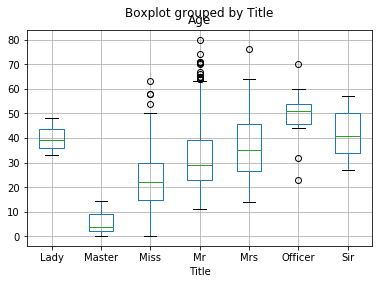

In [74]:
df[df.Age.notnull()].boxplot('Age','Title')

In [75]:
#it can be seen that Ages vary fairly with Title.
title_age_median = df.groupby('Title').Age.transform('median')
df.Age.fillna(title_age_median,inplace=True)

In [76]:
df[df.Age.isnull()].Age

Series([], Name: Age, dtype: float64)

# Checking for out liers

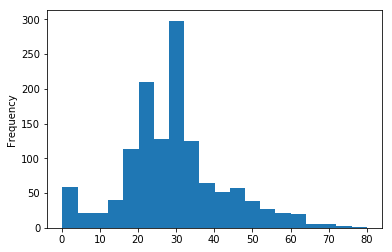

In [77]:
df.Age.plot(kind="hist",bins=20)

In [78]:
#extreme values exist above 65
df.loc[df.Age>65]

Age    Cabin Embarked      Fare  \
PassengerId                                     
34           66.0      NaN        S   10.5000   
97           71.0       A5        C   34.6542   
117          70.5      NaN        Q    7.7500   
494          71.0      NaN        C   49.5042   
631          80.0      A23        S   30.0000   
673          70.0      NaN        S   10.5000   
746          70.0      B22        S   71.0000   
852          74.0      NaN        S    7.7750   
973          67.0  C55 C57        S  221.7792   
988          76.0      C46        S   78.8500   

                                                          Name  Parch  Pclass  \
PassengerId                                                                     
34                                       Wheadon, Mr. Edward H      0       2   
97                                   Goldschmidt, Mr. George B      0       1   
117                                       Connors, Mr. Patrick      0       3   
494                                    Artagaveytia, Mr. Ramon      0       1   
631                       Barkworth, Mr. Algernon Henry Wilson      0       1   
673                                Mitchell, Mr. Henry Michael      0       2   
746                               Crosby, Capt. Edward Gifford      1       1   
852                                        Svensson, Mr. Johan      0       3   
973                                         Straus, Mr. Isidor      0       1   
988          Cavendish, Mrs. Tyrell William (Julia Florence...      0       1   

                Sex  SibSp  Survived      Ticket    Title  
PassengerId                                                
34             male      0         0  C.A. 24579       Mr  
97             male      0         0    PC 17754       Mr  
117            male      0         0      370369       Mr  
494            male      0         0    PC 17609       Mr  
631            male      0         1       27042       Mr  
673            male      0         0  C.A. 24580       Mr  
746            male      1         0   WE/P 5735  Officer  
852            male      0         0      347060       Mr  
973            male      1      -888    PC 17483       Mr  
988          female      1      -888       19877      Mrs

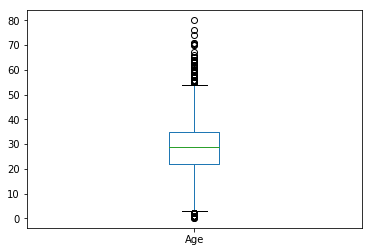

In [79]:
#check with box plot 
df.Age.plot(kind="box")

In [80]:
df.loc[df.Age == df.Age.max()]

Age Cabin Embarked  Fare                                  Name  \
PassengerId                                                                    
631          80.0   A23        S  30.0  Barkworth, Mr. Algernon Henry Wilson   

             Parch  Pclass   Sex  SibSp  Survived Ticket Title  
PassengerId                                                     
631              0       1  male      0         1  27042    Mr

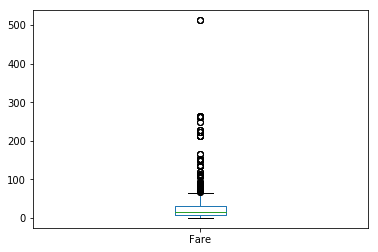

In [81]:
#check for Fare Too
df.Fare.plot(kind="box")

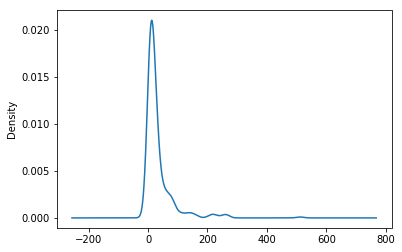

In [82]:
df.Fare.plot(kind="kde")

In [83]:
#from Above it can be seen that they is some skew
df.Fare.skew()

4.369213744046745

In [84]:
df.loc[df.Fare == df.Fare.max()]

Age        Cabin Embarked      Fare  \
PassengerId                                         
259          35.0          NaN        C  512.3292   
680          36.0  B51 B53 B55        C  512.3292   
738          35.0         B101        C  512.3292   
1235         58.0  B51 B53 B55        C  512.3292   

                                                          Name  Parch  Pclass  \
PassengerId                                                                     
259                                           Ward, Miss. Anna      0       1   
680                         Cardeza, Mr. Thomas Drake Martinez      1       1   
738                                     Lesurer, Mr. Gustave J      0       1   
1235         Cardeza, Mrs. James Warburton Martinez (Charlo...      1       1   

                Sex  SibSp  Survived    Ticket Title  
PassengerId                                           
259          female      0         1  PC 17755  Miss  
680            male      0         1  PC 17755    Mr  
738            male      0         1  PC 17755    Mr  
1235         female      0      -888  PC 17755   Mrs

In [85]:
df.Fare.max()

512.3292

In [86]:
n = df.Fare.max() - df.Fare.mean()
n = n/(df.Fare.std())
print(n)

9.258210764395843


In [87]:
#Values are more than 3 std deviations out!
#We attempt to use transformations to use skewness using log for example
LogFare = np.log(df.Fare + 1.0)

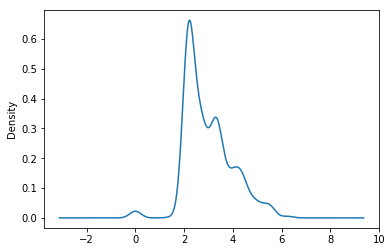

In [88]:
#lets see the effects on a kde plot
LogFare.plot(kind="kde")

In [89]:
LogFare.skew()

0.5431415164397223

In [90]:
#From the above skew has reduced from 4.* to 0.5

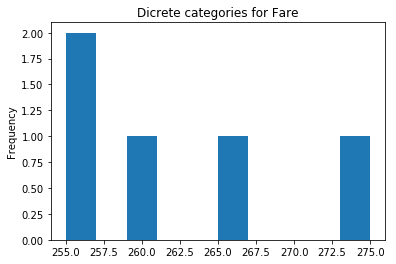

In [91]:
#we Attempt class sizing or discretization
pd.qcut(df.Fare,5).value_counts().plot(kind="hist",title="Dicrete categories for Fare")

In [92]:
#adding the new categories to the table/dataframe
df['Fare_Bin'] = pd.qcut(df.Fare,4,labels=['very_low','low','high','very_high'])

In [93]:
df.Fare_Bin

PassengerId
1        very_low
2       very_high
3             low
4       very_high
5             low
6             low
7       very_high
8            high
9             low
10           high
11           high
12           high
13            low
14           high
15       very_low
16           high
17           high
18            low
19           high
20       very_low
21           high
22            low
23            low
24      very_high
25           high
26      very_high
27       very_low
28      very_high
29       very_low
30       very_low
          ...    
1280     very_low
1281         high
1282    very_high
1283    very_high
1284         high
1285          low
1286         high
1287    very_high
1288     very_low
1289    very_high
1290     very_low
1291     very_low
1292    very_high
1293         high
1294    very_high
1295    very_high
1296         high
1297          low
1298          low
1299    very_high
1300     very_low
1301          low
1302     very_low
1303    very_hig

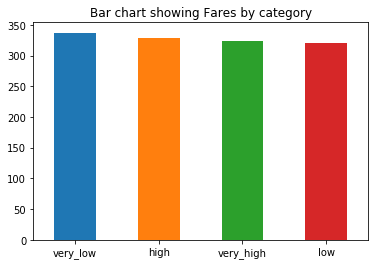

In [94]:
df.Fare_Bin.value_counts().plot(kind='bar',rot=0,title="Bar chart showing Fares by category")

Feature Engineering

In [95]:
#In feature engineering, knowledge of the domain and expertise is essentital

In [96]:
#For Example, Trying to categorize based on Age as kids were most likely to be saved.
df['AgeState']= np.where(df['Age'] >= 18,'Adult','Child')

In [97]:
df.head(5)

Age Cabin Embarked     Fare  \
PassengerId                                 
1            22.0   NaN        S   7.2500   
2            38.0   C85        C  71.2833   
3            26.0   NaN        S   7.9250   
4            35.0  C123        S  53.1000   
5            35.0   NaN        S   8.0500   

                                                          Name  Parch  Pclass  \
PassengerId                                                                     
1                                      Braund, Mr. Owen Harris      0       3   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...      0       1   
3                                       Heikkinen, Miss. Laina      0       3   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)      0       1   
5                                     Allen, Mr. William Henry      0       3   

                Sex  SibSp  Survived            Ticket Title   Fare_Bin  \
PassengerId                                                               
1              male      1         0         A/5 21171    Mr   very_low   
2            female      1         1          PC 17599   Mrs  very_high   
3            female      0         1  STON/O2. 3101282  Miss        low   
4            female      1         1            113803   Mrs  very_high   
5              male      0         0            373450    Mr        low   

            AgeState  
PassengerId           
1              Adult  
2              Adult  
3              Adult  
4              Adult  
5              Adult

In [98]:
df.head()

Age Cabin Embarked     Fare  \
PassengerId                                 
1            22.0   NaN        S   7.2500   
2            38.0   C85        C  71.2833   
3            26.0   NaN        S   7.9250   
4            35.0  C123        S  53.1000   
5            35.0   NaN        S   8.0500   

                                                          Name  Parch  Pclass  \
PassengerId                                                                     
1                                      Braund, Mr. Owen Harris      0       3   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...      0       1   
3                                       Heikkinen, Miss. Laina      0       3   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)      0       1   
5                                     Allen, Mr. William Henry      0       3   

                Sex  SibSp  Survived            Ticket Title   Fare_Bin  \
PassengerId                                                               
1              male      1         0         A/5 21171    Mr   very_low   
2            female      1         1          PC 17599   Mrs  very_high   
3            female      0         1  STON/O2. 3101282  Miss        low   
4            female      1         1            113803   Mrs  very_high   
5              male      0         0            373450    Mr        low   

            AgeState  
PassengerId           
1              Adult  
2              Adult  
3              Adult  
4              Adult  
5              Adult

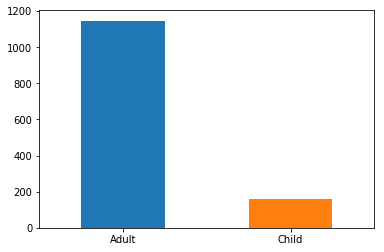

In [99]:
df.AgeState.value_counts().plot(kind='bar',rot=0)

In [100]:
df['FamilySize'] = df.Parch + df.SibSp + 1 #1 for self

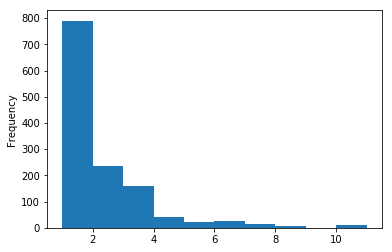

In [101]:
df.FamilySize.plot(kind='hist')

In [102]:
df.loc[(df.FamilySize == df.FamilySize.max()),['Name','AgeState','FamilySize','Survived']]

Name AgeState  FamilySize  Survived
PassengerId                                                                  
160                 Sage, Master. Thomas Henry    Child          11         0
181               Sage, Miss. Constance Gladys    Adult          11         0
202                        Sage, Mr. Frederick    Adult          11         0
325                   Sage, Mr. George John Jr    Adult          11         0
793                    Sage, Miss. Stella Anna    Adult          11         0
847                   Sage, Mr. Douglas Bullen    Adult          11         0
864          Sage, Miss. Dorothy Edith "Dolly"    Adult          11         0
1080                           Sage, Miss. Ada    Adult          11      -888
1234                     Sage, Mr. John George    Adult          11      -888
1252               Sage, Master. William Henry    Child          11      -888
1257            Sage, Mrs. John (Annie Bullen)    Adult          11      -888

In [103]:
pd.crosstab(df[df.Survived != -888].Survived,df[df.Survived != -888].FamilySize)

FamilySize   1   2   3   4   5   6   7   8   11
Survived                                       
0           374  72  43   8  12  19   8   6   7
1           163  89  59  21   3   3   4   0   0

In [104]:
df['isMother'] = np.where(((df.Sex == 'female') & (df.Parch > 0) & (df.Age > 18) & (df.Title !='Miss')),1,0)

In [105]:
#testing mother survival rate 
pd.crosstab(df[df.Survived != -888].Survived,df[df.Survived != -888].isMother)

isMother    0   1
Survived         
0         533  16
1         303  39

## Encoding Categorical Features

In [106]:
#Encoding Gender
df['isMale'] = np.where(df.Sex == 'male', 1,0)

In [107]:
df.loc[df.isMale == 1]

Age        Cabin Embarked      Fare  \
PassengerId                                         
1            22.0          NaN        S    7.2500   
5            35.0          NaN        S    8.0500   
6            29.0          NaN        Q    8.4583   
7            54.0          E46        S   51.8625   
8             2.0          NaN        S   21.0750   
13           20.0          NaN        S    8.0500   
14           39.0          NaN        S   31.2750   
17            2.0          NaN        Q   29.1250   
18           29.0          NaN        S   13.0000   
21           35.0          NaN        S   26.0000   
22           34.0          D56        S   13.0000   
24           28.0           A6        S   35.5000   
27           29.0          NaN        C    7.2250   
28           19.0  C23 C25 C27        S  263.0000   
30           29.0          NaN        S    7.8958   
31           40.0          NaN        C   27.7208   
34           66.0          NaN        S   10.5000   
35           28.0          NaN        C   82.1708   
36           42.0          NaN        S   52.0000   
37           29.0          NaN        C    7.2292   
38           21.0          NaN        S    8.0500   
43           29.0          NaN        C    7.8958   
46           29.0          NaN        S    8.0500   
47           29.0          NaN        Q   15.5000   
49           29.0          NaN        C   21.6792   
51            7.0          NaN        S   39.6875   
52           21.0          NaN        S    7.8000   
55           65.0          B30        C   61.9792   
56           29.0          C52        S   35.5000   
58           28.5          NaN        C    7.2292   
...           ...          ...      ...       ...   
1262         21.0          NaN        S   11.5000   
1264         49.0  B52 B54 B56        S    0.0000   
1265         44.0          NaN        S   13.0000   
1269         21.0          NaN        S   11.5000   
1270         55.0          C39        S   50.0000   
1271          5.0          NaN        S   31.3875   
1272         29.0          NaN        Q    7.7500   
1273         26.0          NaN        Q    7.8792   
1276         29.0          NaN        S   12.8750   
1278         24.0          NaN        S    7.7750   
1279         57.0          NaN        S   13.0000   
1280         21.0          NaN        Q    7.7500   
1281          6.0          NaN        S   21.0750   
1282         23.0          B24        S   93.5000   
1284         13.0          NaN        S   20.2500   
1285         47.0          NaN        S   10.5000   
1286         29.0          NaN        S   22.0250   
1288         24.0          NaN        Q    7.2500   
1290         22.0          NaN        S    7.7750   
1291         31.0          NaN        Q    7.7333   
1293         38.0          NaN        S   21.0000   
1295         17.0          NaN        S   47.1000   
1296         43.0          D40        C   27.7208   
1297         20.0          D38        C   13.8625   
1298         23.0          NaN        S   10.5000   
1299         50.0          C80        C  211.5000   
1305         29.0          NaN        S    8.0500   
1307         38.5          NaN        S    7.2500   
1308         29.0          NaN        S    8.0500   
1309          4.0          NaN        C   22.3583   

                                                     Name  Parch  Pclass  \
PassengerId                                                                
1                                 Braund, Mr. Owen Harris      0       3   
5                                Allen, Mr. William Henry      0       3   
6                                        Moran, Mr. James      0       3   
7                                 McCarthy, Mr. Timothy J      0       1   
8                          Palsson, Master. Gosta Leonard      1       3   
13                         Saundercock, Mr. William Henry      0       3   
14                            Andersson, Mr. Anders Johan      5  

# Deck

In [108]:
df.Cabin

PassengerId
1               NaN
2               C85
3               NaN
4              C123
5               NaN
6               NaN
7               E46
8               NaN
9               NaN
10              NaN
11               G6
12             C103
13              NaN
14              NaN
15              NaN
16              NaN
17              NaN
18              NaN
19              NaN
20              NaN
21              NaN
22              D56
23              NaN
24               A6
25              NaN
26              NaN
27              NaN
28      C23 C25 C27
29              NaN
30              NaN
           ...     
1280            NaN
1281            NaN
1282            B24
1283            D28
1284            NaN
1285            NaN
1286            NaN
1287            C31
1288            NaN
1289            B41
1290            NaN
1291            NaN
1292             C7
1293            NaN
1294            NaN
1295            NaN
1296            D40
1297            D38
1298    

In [109]:
#check for the unique values in Cabin
df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [110]:
df.loc[df.Cabin == 'T']

Age Cabin Embarked  Fare                          Name  Parch  \
PassengerId                                                                   
340          45.0     T        S  35.5  Blackwell, Mr. Stephen Weart      0   

             Pclass   Sex  SibSp  Survived  Ticket Title   Fare_Bin AgeState  \
PassengerId                                                                    
340               1  male      0         0  113784    Mr  very_high    Adult   

             FamilySize  isMother  isMale  
PassengerId                                
340                   1         0       1

In [111]:
df.loc[df.Cabin == 'T','Cabin'] = np.NaN

In [112]:
df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44', 'A34',
       'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37',
       'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39',
       'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41',
       'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58',
       'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64', 'E24

In [113]:
def get_deck(cabin):
    return np.where(pd.notnull(cabin),str(cabin)[0].upper(),'Z')
df['Deck'] = df['Cabin'].map(lambda x: get_deck(x))

In [114]:
df.Deck.value_counts()

Z    1015
C      94
B      65
D      46
E      41
A      22
F      21
G       5
Name: Deck, dtype: int64

In [115]:
pd.crosstab(df[df.Survived != -888].Survived,df[df.Survived != -888].Deck)

Deck      A   B   C   D   E  F  G    Z
Survived                              
0         8  12  24   8   8  5  2  482
1         7  35  35  25  24  8  2  206

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 18 columns):
Age           1309 non-null float64
Cabin         294 non-null object
Embarked      1309 non-null object
Fare          1309 non-null float64
Name          1309 non-null object
Parch         1309 non-null int64
Pclass        1309 non-null int64
Sex           1309 non-null object
SibSp         1309 non-null int64
Survived      1309 non-null int64
Ticket        1309 non-null object
Title         1309 non-null object
Fare_Bin      1309 non-null category
AgeState      1309 non-null object
FamilySize    1309 non-null int64
isMother      1309 non-null int64
isMale        1309 non-null int64
Deck          1309 non-null object
dtypes: category(1), float64(2), int64(7), object(8)
memory usage: 225.5+ KB


# Categorical feature encoding

One-Hot encoding

In [117]:
df = pd.get_dummies(df,columns=['Deck','Pclass','Title','Fare_Bin','Embarked','AgeState'])

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 39 columns):
Age                   1309 non-null float64
Cabin                 294 non-null object
Fare                  1309 non-null float64
Name                  1309 non-null object
Parch                 1309 non-null int64
Sex                   1309 non-null object
SibSp                 1309 non-null int64
Survived              1309 non-null int64
Ticket                1309 non-null object
FamilySize            1309 non-null int64
isMother              1309 non-null int64
isMale                1309 non-null int64
Deck_A                1309 non-null uint8
Deck_B                1309 non-null uint8
Deck_C                1309 non-null uint8
Deck_D                1309 non-null uint8
Deck_E                1309 non-null uint8
Deck_F                1309 non-null uint8
Deck_G                1309 non-null uint8
Deck_Z                1309 non-null uint8
Pclass_1              1309 non-null uint8
Pcla

In [119]:
df.drop(['Cabin','Name','Ticket','Parch','SibSp','Sex'],axis=1,inplace=True)

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 33 columns):
Age                   1309 non-null float64
Fare                  1309 non-null float64
Survived              1309 non-null int64
FamilySize            1309 non-null int64
isMother              1309 non-null int64
isMale                1309 non-null int64
Deck_A                1309 non-null uint8
Deck_B                1309 non-null uint8
Deck_C                1309 non-null uint8
Deck_D                1309 non-null uint8
Deck_E                1309 non-null uint8
Deck_F                1309 non-null uint8
Deck_G                1309 non-null uint8
Deck_Z                1309 non-null uint8
Pclass_1              1309 non-null uint8
Pclass_2              1309 non-null uint8
Pclass_3              1309 non-null uint8
Title_Lady            1309 non-null uint8
Title_Master          1309 non-null uint8
Title_Miss            1309 non-null uint8
Title_Mr              1309 non-null uint8
Title_M

In [121]:
columns = [column for column in df.columns if column != 'Survived' ]
columns = ['Survived'] +columns
df = df[columns]

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 33 columns):
Survived              1309 non-null int64
Age                   1309 non-null float64
Fare                  1309 non-null float64
FamilySize            1309 non-null int64
isMother              1309 non-null int64
isMale                1309 non-null int64
Deck_A                1309 non-null uint8
Deck_B                1309 non-null uint8
Deck_C                1309 non-null uint8
Deck_D                1309 non-null uint8
Deck_E                1309 non-null uint8
Deck_F                1309 non-null uint8
Deck_G                1309 non-null uint8
Deck_Z                1309 non-null uint8
Pclass_1              1309 non-null uint8
Pclass_2              1309 non-null uint8
Pclass_3              1309 non-null uint8
Title_Lady            1309 non-null uint8
Title_Master          1309 non-null uint8
Title_Miss            1309 non-null uint8
Title_Mr              1309 non-null uint8
Title_M

# Save the new dataframe to file.

In [123]:
#Set the path for processed data
processed_data_path = os.path.join(default_path,'data','processed')
write_train_path = os.path.join(processed_data_path,'train.csv')
write_test_path = os.path.join(processed_data_path,'test.csv')

In [124]:
#train data
df.loc[df.Survived != -888].to_csv(write_train_path)
#test data
columns = [column for column in df.columns if columns != 'Survived']
df.loc[df.Survived == -888,columns].to_csv(write_test_path)

In [126]:
list(df)

['Survived',
 'Age',
 'Fare',
 'FamilySize',
 'isMother',
 'isMale',
 'Deck_A',
 'Deck_B',
 'Deck_C',
 'Deck_D',
 'Deck_E',
 'Deck_F',
 'Deck_G',
 'Deck_Z',
 'Pclass_1',
 'Pclass_2',
 'Pclass_3',
 'Title_Lady',
 'Title_Master',
 'Title_Miss',
 'Title_Mr',
 'Title_Mrs',
 'Title_Officer',
 'Title_Sir',
 'Fare_Bin_very_low',
 'Fare_Bin_low',
 'Fare_Bin_high',
 'Fare_Bin_very_high',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S',
 'AgeState_Adult',
 'AgeState_Child']